train acc, test acc | 0.13305, 0.1407
train acc, test acc | 0.7968333333333333, 0.8006
train acc, test acc | 0.87635, 0.8813
train acc, test acc | 0.89795, 0.9015
train acc, test acc | 0.9083, 0.9105
train acc, test acc | 0.9144166666666667, 0.916
train acc, test acc | 0.9203833333333333, 0.921
train acc, test acc | 0.9239833333333334, 0.9227
train acc, test acc | 0.9276666666666666, 0.9296
train acc, test acc | 0.9314, 0.9322
train acc, test acc | 0.9336333333333333, 0.9342
train acc, test acc | 0.9368166666666666, 0.9361
train acc, test acc | 0.9386833333333333, 0.937
train acc, test acc | 0.9412166666666667, 0.9408
train acc, test acc | 0.9433, 0.9419
train acc, test acc | 0.9450666666666667, 0.9445
train acc, test acc | 0.9470166666666666, 0.9446


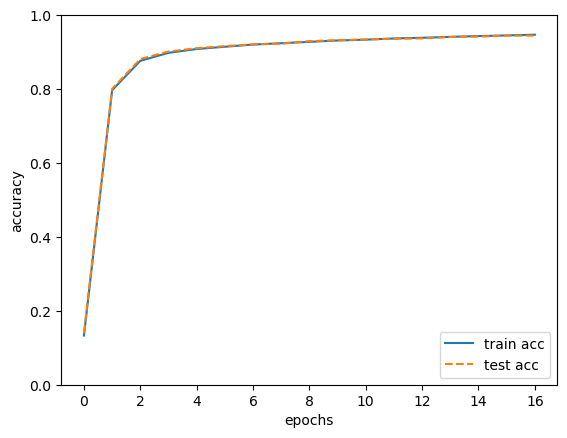

In [7]:
# coding: utf-8
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt
import pickle

(x_train, t_train),(x_test,t_test) = load_mnist(flatten=True, one_hot_label=True)
iters_num = 10000
batch_size = 100
train_size = x_train.shape[0]  #60000
lr = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

# define model
model = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# train model
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 数值法求梯度
    #grad = model.numerical_gradient(x_batch, t_batch)
    grad = model.gradient(x_batch, t_batch)
    for key in ('W1','b1','W2','b2'):
        model.params[key] -= lr * grad[key]
        
        loss = model.loss(x_batch,t_batch)
        train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = model.accuracy(x_train, t_train)
        test_acc = model.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# output model params
params = model.params
with open('model_params.pkl', 'wb') as f:
    pickle.dump(params, f, -1)

# draw loss
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()